# Pymaceuticals Inc.
---

### Analysis

- Based off the box plots of the final tumor volumes, the effectiveness of Capomulin seems to be comparable to Ramicane, but is significantly more effective than Infubinol and Ceftamine.

- The heavier the mouse, the less effective the drug is. This is a reliable conclusion because of the strong r-value correlation (0.95) resulting from the linear regression.

- The results of the study are reliable, as there is only one outlier in the data set for the top drugs, and none for Capomulin. Minimal outliers prevent the data from becoming too skewed, and thus, unable to draw good conclusions from. Because this data has next to outliers, it is safe to assume the data is a good represenation of the population it comes from.


 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")

# Display the data table for preview
mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
number_of_mice = len(mouse_study.groupby('Mouse ID').count())
print(number_of_mice)

249


In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# First we need to find the duplicate mice.
duplicate_mice = mouse_study.loc[mouse_study.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
duplicate_mice


array(['g989'], dtype=object)

In [5]:
# Next we get all the data for the duplicate mouse ID. 
duplicate_id = mouse_study.loc[mouse_study["Mouse ID"] == "g989", :]
duplicate_id

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = mouse_study[mouse_study['Mouse ID'].isin(duplicate_mice)==False]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice in the clean DataFrame.

# First we need to get a list of all the mice in the dataframe.
clean_mice = clean_df['Mouse ID'].value_counts()

# Then we take the length of that list to get the number of mice.
clean_mouse_number = len(clean_mice)
clean_mouse_number

248

## Summary Statistics

In [17]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the
# mean, median, variance, standard deviation, and SEM of the tumor volume, of each drug regimen:

regimen_group_df = clean_df.groupby('Drug Regimen')

regimen_mean = regimen_group_df['Tumor Volume (mm3)'].mean()
regimen_median = regimen_group_df['Tumor Volume (mm3)'].median()
regimen_variance = regimen_group_df['Tumor Volume (mm3)'].var()
regimen_standard_deviation = regimen_group_df['Tumor Volume (mm3)'].std()
regimen_sem = regimen_group_df['Tumor Volume (mm3)'].sem(ddof=0)

# Assemble the resulting series into a single summary DataFrame.

summary_statistics_df = pd.DataFrame({"Mean Tumor Volume": regimen_mean, 
                                     "Median Tumor Volume":regimen_median, 
                                     "Tumor Volume Variance":regimen_variance, 
                                     "Tumor Volume Std. Dev.": regimen_standard_deviation, 
                                     "Tumor Volume Std. Err.": regimen_sem})

summary_statistics_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.328629
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.468499
Infubinol,52.884795,51.820584,43.128684,6.567243,0.490851
Ketapril,55.235638,53.698743,68.553577,8.279709,0.602252
Naftisol,54.331565,52.509285,66.173479,8.134708,0.594860
Placebo,54.033581,52.288934,61.168083,7.821003,0.579722
Propriva,52.320930,50.446266,43.852013,6.622085,0.542490
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320250
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.571526


In [18]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line.

summary_stat_group_df = clean_df.groupby(clean_df["Drug Regimen"]).agg({'Tumor Volume (mm3)': ["mean", 
                                               "median",
                                               "var",
                                               "std",
                                               "sem"]})
summary_stat_group_df


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

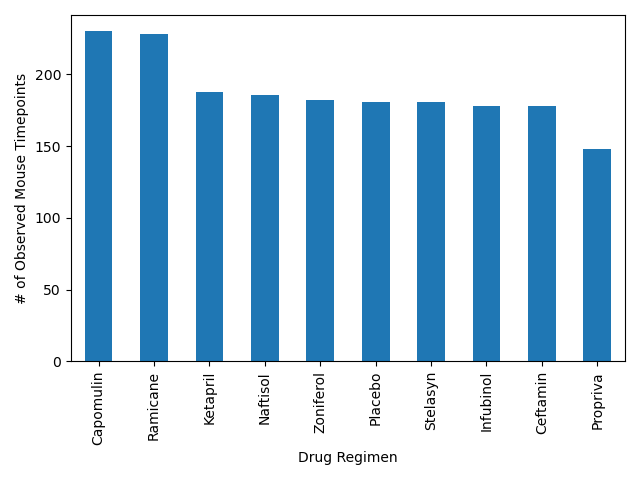

In [16]:
%matplotlib widget

# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

mice_count = clean_df["Drug Regimen"].value_counts()

mice_count.plot(kind='bar', xlabel="Drug Regimen", ylabel="# of Observed Mouse Timepoints")

plt.tight_layout()
plt.show()


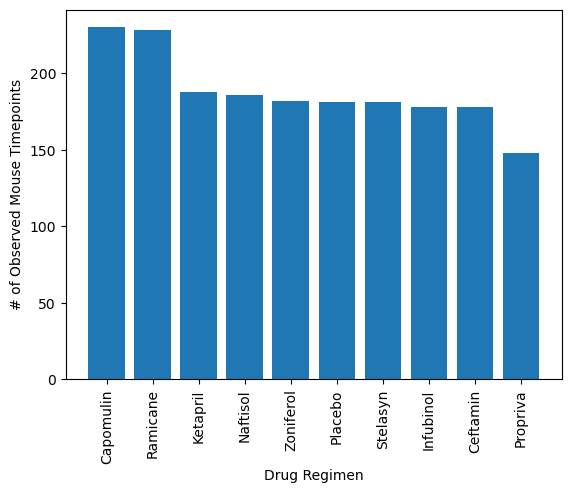

In [15]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
mice_count = clean_df["Drug Regimen"].value_counts()
x_axis = mice_count.index.values
y_axis = mice_count.values

# Creating a pyplot bar plot using above x_axis and y_axis.
plt.bar(x_axis, y_axis, color='tab:blue')
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation="vertical")
plt.show()

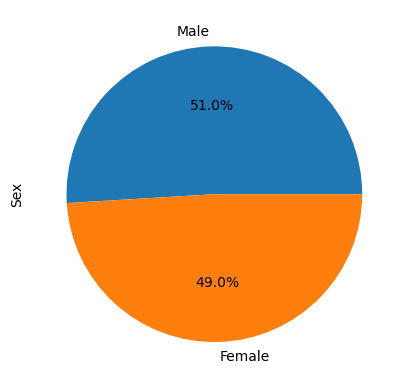

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_data = clean_df["Sex"].value_counts()
sex_data.plot(kind="pie", ylabel="Sex", autopct= "%1.1f%%")
plt.show()

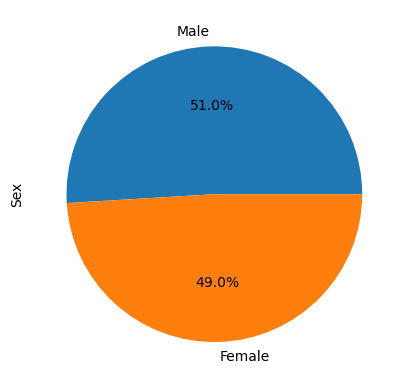

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_data = clean_df["Sex"].value_counts()

# Creating a pyplot bar plot using above labels.
plt.pie(sex_data, labels=clean_df['Sex'].unique(), autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

In [12]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
mouse_timepoint = mouse_study.groupby(["Mouse ID"]).max()
mouse_timepoint_reset = mouse_timepoint.reset_index()

timepoint_merged_data_frame = mouse_timepoint_reset[['Mouse ID','Timepoint']].\
    merge(mouse_study,on=['Mouse ID','Timepoint'],how="left")

# Put treatments into a list for for loop (and later for plot labels)
drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
drug_values = []

for drug in drug_list:
    
    # Create subset dataframes that narrow down to rows only containing the final timepoint for each regimen
    final_volume_df = timepoint_merged_data_frame.loc[timepoint_merged_data_frame["Drug Regimen"] == drug]['Tumor Volume (mm3)']
    # Create a series that consists of all final volume values for each regimen
    values = final_volume_df
    drug_values.append(values)
    
    # Calculate and print the interquartile range (IQR) for each regimen
    quartiles = final_volume_df.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    # Find upper and lower bounds to help identify outliers for each regimen
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    # Determine outliers using upper and lower bounds
    outliers = final_volume_df.loc[(final_volume_df < lower_bound) | (final_volume_df > upper_bound)]

    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


Text(0.5, 1.0, 'Tumor Volume at Selected Mouse')

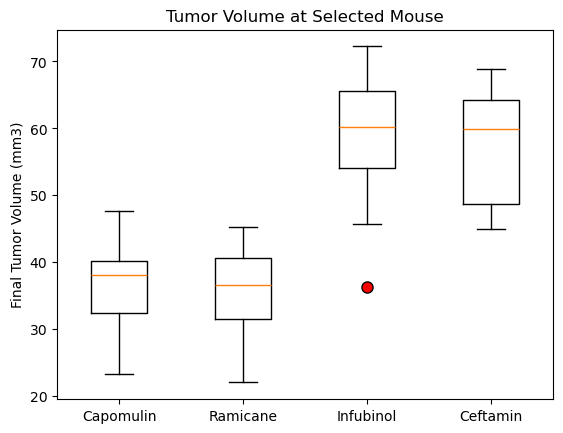

In [11]:
# I couldn't figure out how to make the drug_values list work with the box plot, so I went for a function instead.

# Getting the last (greatest) timepoint for each mouse
mouse_timepoint = mouse_study.groupby(["Mouse ID"]).max()
mouse_timepoint_reset = mouse_timepoint.reset_index()

# Merging this group df with the original DataFrame to get the tumor volume at the last timepoint
timepoint_merged_data_frame = mouse_timepoint_reset[['Mouse ID','Timepoint']].\
    merge(mouse_study,on=['Mouse ID','Timepoint'],how="left")

# Putting treatments into a list for for loop (and later for plot labels)
def outliers(regimen):
    regimen_data = timepoint_merged_data_frame.loc[timepoint_merged_data_frame["Drug Regimen"] == regimen]['Tumor Volume (mm3)']
    
    quartiles = regimen_data.quantile([.25,.5,.75])
    quart_first = quartiles[0.25]
    quart_last = quartiles[0.75]
    quart_range = quart_last - quart_first
    lower_bound = quart_first - (1.5 * quart_range)
    upper_bound = quart_last + (1.5 * quart_range)
    
# Determining outliers using upper and lower bounds
    outliers = regimen_data.loc[(regimen_data < lower_bound) | (regimen_data > upper_bound)]
    return regimen_data
    
cap = outliers("Capomulin")
ram = outliers("Ramicane")
inf = outliers("Infubinol")
ceft = outliers("Ceftamin")


red_point = dict(markerfacecolor = "red", markersize=8)
plt.boxplot([cap, ram, inf, ceft],labels=['Capomulin','Ramicane','Infubinol','Ceftamin'],flierprops= red_point)
plt.ylabel('Final Tumor Volume (mm3)')
plt.title('Tumor Volume at Selected Mouse')

## Line and Scatter Plots

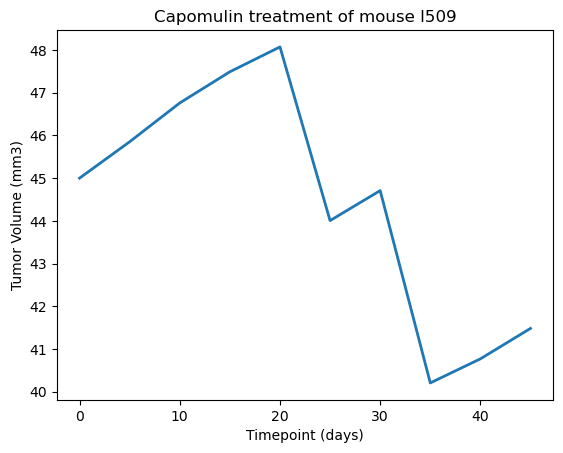

In [10]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Identify data points of a mouse treated with Capomulin
capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
# Identify a single mouse in the capomulin_df
single_mouse = capomulin_df.loc[capomulin_df["Mouse ID"] == "l509",:]


single_mouse.head()
x_axis = single_mouse["Timepoint"]
tumsiz = single_mouse["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatment of mouse l509')
plt.plot(x_axis, tumsiz,linewidth=2)
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()


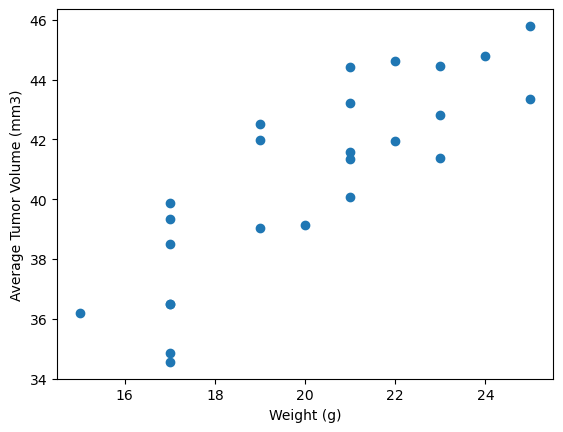

In [9]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Isolate cases that only use the Capomulin regimen.
capomulin_df = mouse_study.loc[mouse_study['Drug Regimen'] == 'Capomulin']

# Find average tumor volume for each mouse.

avg_vol_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})

# Merge average tumor volume onto data_df and drop duplicates
avg_vol_df = pd.merge(capomulin_df, avg_vol_df, on='Mouse ID')
final_avg_vol_df = avg_vol_df[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
final_avg_vol_df

x = final_avg_vol_df['Weight (g)']
y = final_avg_vol_df['avg_tumor_vol']

# Create a scatter plot based on new dataframe above with circle markers and listed colors
plt.scatter(x, y)

# Add labels and title to plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
# Display plot
plt.show()

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen


The correlation between weight and the average tumor volume is 0.84


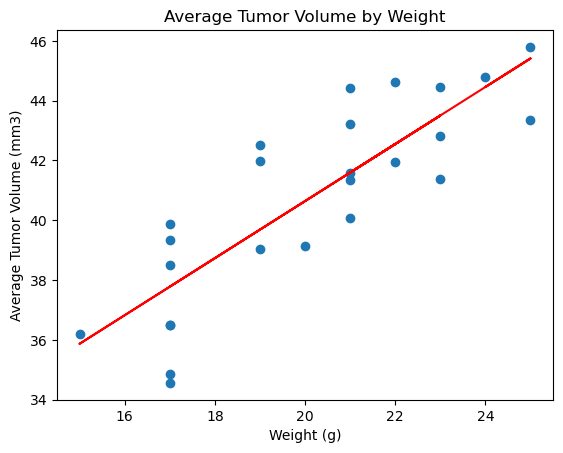

In [8]:
# Duplicating code for scatter plot from above:

capomulin_df = mouse_study.loc[mouse_study['Drug Regimen'] == 'Capomulin']
avg_vol_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})
avg_vol_df = pd.merge(capomulin_df, avg_vol_df, on='Mouse ID')
final_avg_vol_df = avg_vol_df[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
final_avg_vol_df
x = final_avg_vol_df['Weight (g)']
y = final_avg_vol_df['avg_tumor_vol']

# Calculate the correlation coefficient between mouse weight and average tumor volume
correlation = st.pearsonr(x,y)

# Print the answer to above calculation
print(f"""The correlation between weight and the average tumor volume is {round(correlation[0],2)}""")

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot linear regression on top of scatter plot
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

# Add labels and title to plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
plt.show()